<a href="https://colab.research.google.com/github/Noxscamp/CoderHouse/blob/main/Data_Storytelling2%2BMarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # ***Video Game Sales*** 🎮

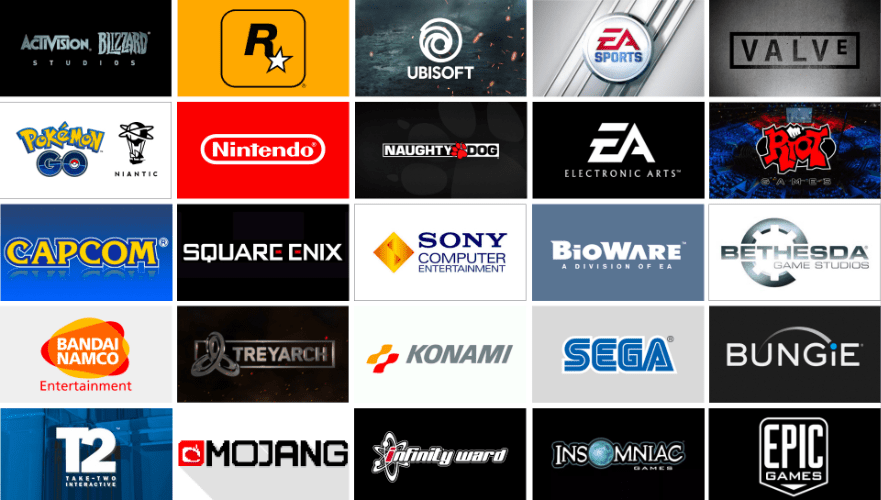


# Definición del objetivo
Con los datos históricos que se posee acerca de los videojuegos, géneros, plataformas y ventas, buscamos obtener indicios que demuestren qué tipos de plataformas serán las más utilizadas a futuro y qué genero tendrá mayor relevancia permitiendo desarrollar nueva información sobre futuras ventas.
# Contexto comercial
Debido al constante cambio tecnologico que vivimos, se ha producido un enorme desarrollo en los videojuegos, los cuales están próximos a simular nuestra realidad, lo cual nos benificiaría a la hora de tomar desiciones, realizar ensayos o pruebas en dispositivos, entrenar a un piloto o una IA, diseñar y modificar estructuras previo a fabricarlas, etc permitiendo ahorrar costos y tiempo. Es por eso que las empresas más importantes del mundo están en la búsqueda de tecnologías como plataformas de videojuegos y simuladores que les permitan encontrar nuevas soluciones a sus servicios de forma más inmersiva.
# Problema comercial
Se pretende contar con un modelo predictivo que ayude a tomar las desiciones correctas sobre el futuro de las plataformas y géneros más relevantes de videojuegos.
# Contexto analítico
*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: Año en la cual el juego se lanzó.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en Estados Unidos (Millones)


*   EU_Sales: Ventas en Europa (Millones)


*   JP_Sales: Ventas en Japon (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


### ***Serie de preguntas***

*   ¿Cuál fue la relación entre las ventas en Estados Unidos y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Europa y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Japón y el resto del mundo? 
*   ¿Cuáles son los juegos mas vendidos?
*   ¿Cuáles son los generos mas vendidos? 
*   ¿Cuál fue el formato de consola más utilizado?
*   ¿Cuál fue el desarrollador que obtuvo más ventas? 
*   ¿Cuál fue la evolución entre las plataformas a lo largo de los años? 

# ***Data Adquisition***

Llamo a las librerias potenciales a utilizar.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [2]:
url='https://raw.githubusercontent.com/leoomc97/datasets/main/vgsales.csv'
resp_vgsales=requests.get(url)
print(resp_vgsales)

<Response [200]>


In [3]:
vgsales = pd.read_csv(url)

In [4]:
df = pd.DataFrame(vgsales)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.shape

(16598, 11)

# ***EDA - Exploratory Data Analysis 📊***

## ***1) Data Wrangling***

Comenzamos realizando la **preparación de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

###Borrado de duplicados

In [6]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


###Análisis de nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Matris de valores perdidos')

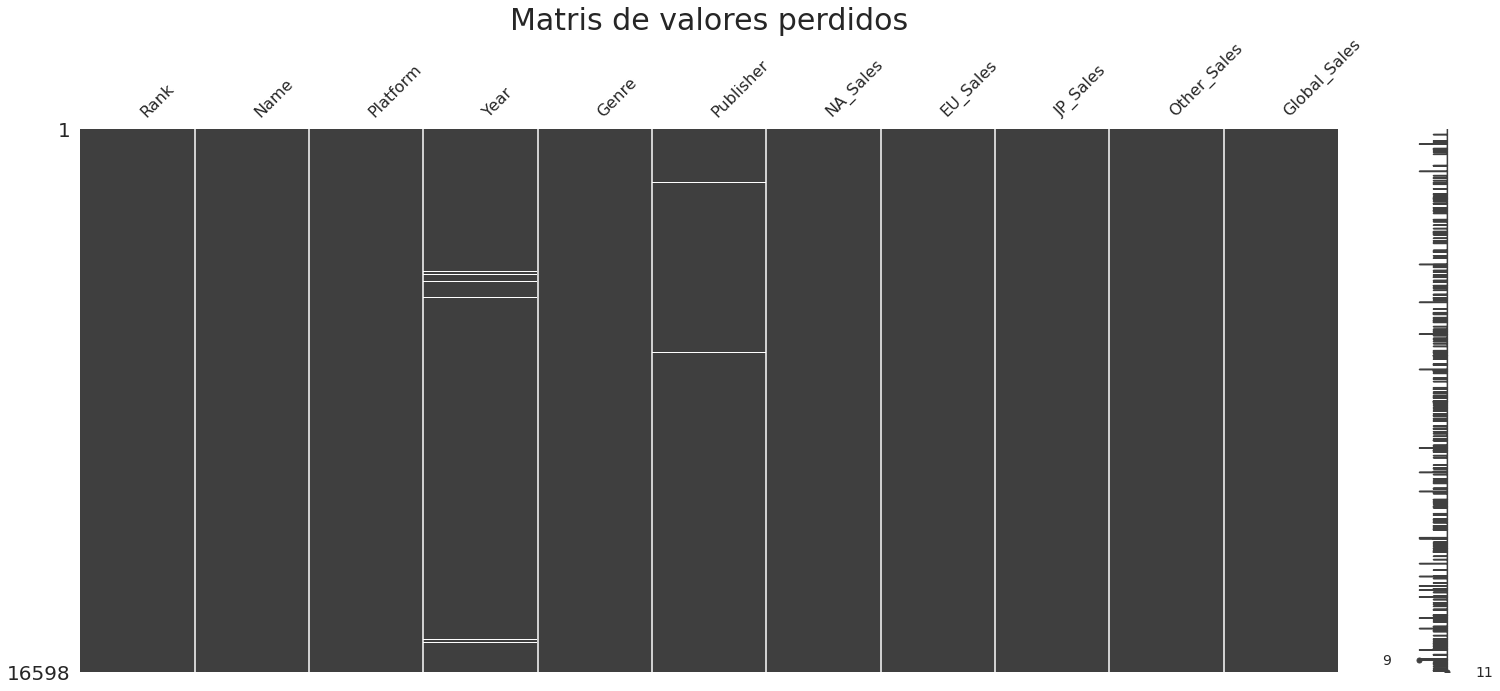

In [8]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

Podemos observar rápidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
Year,Year,1.632727
Publisher,Publisher,0.349440
Rank,Rank,0.000000
Name,Name,0.000000
Platform,Platform,0.000000
Genre,Genre,0.000000
NA_Sales,NA_Sales,0.000000
EU_Sales,EU_Sales,0.000000
JP_Sales,JP_Sales,0.000000
Other_Sales,Other_Sales,0.000000


<Figure size 1080x360 with 0 Axes>

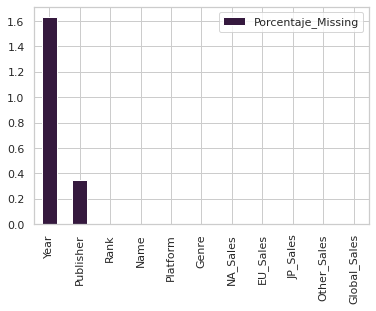

In [11]:
plt.figure(figsize=(15,5))
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "Year" con el 1,6% de los mismos, miertras que en la variable "Publisher" apenas alcanza 0,35% de datos nulos. Por lo tanto, concluimos que los datos nulos no tienen relevancia alguna para nuestro análisis.

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con los datos nulos:

In [12]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Decisión: Al tener muchos datos relevantes, solo eliminaremos aquellos datos que estén vacios.

In [13]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

####Llenar con la catergoría "Desconocido"

In [14]:
col_cat=['Publisher'] #Columnas categóricas

#reemplazar con "Desconocido" en las columnas que estén vacias
for i in col_cat:
  df[i] = df[i].fillna('Desconocido')

df['Publisher'].value_counts().sum()

16598

In [15]:
df.shape

(16598, 11)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".

####Borrado de filas con datos nulos

In [16]:
df = df.dropna(axis=0)

In [17]:
df['Year'].isnull().sum()

0

Podemos observar que ya no hay datos nulos en ambas variables numericas.

###Transformo el tipo de dato de las columnas

Debido a que trabajaremos con años, podemos utilizar variables enteras y no floats.

In [18]:
df["Year"] = df["Year"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###Verifico las transformaciones realizadas en el dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Finalmente, separo un dataframe con valores actuales, desde el año 2000 en adelante, que luego nos será de utilidad.

In [20]:
df_new = df[df.Year >= 2000].sort_values("Year")
df_new

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8628,8630,NCAA Final Four 2001,PS,2000,Sports,Sony Computer Entertainment,0.09,0.06,0.00,0.01,0.16
4516,4518,TimeSplitters,PS2,2000,Shooter,Eidos Interactive,0.21,0.17,0.00,0.06,0.43
8339,8341,Turok 3: Shadow of Oblivion,N64,2000,Shooter,Acclaim Entertainment,0.12,0.05,0.00,0.00,0.17
1185,1187,Smuggler's Run,PS2,2000,Racing,Take-Two Interactive,0.77,0.60,0.00,0.20,1.56
8361,8363,Nightmare Creatures II,PS,2000,Action,Konami Digital Entertainment,0.09,0.06,0.00,0.01,0.17
...,...,...,...,...,...,...,...,...,...,...,...
15714,15717,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.02
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


## ***2) Correlaciones y dependencias***

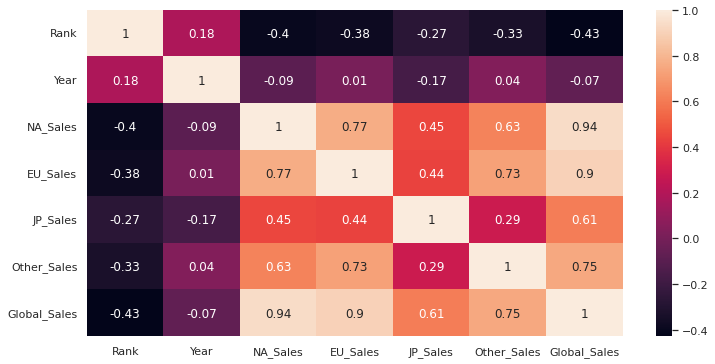

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

Las ventas en Norte America, Europa y Japón influyen de manera significante en el resto del mundo, con una correlación de 0.82, 0.64 y 0.73 respectivamente.

Sin embargo, no existe una gran correlación entre las ventas de Norte America, Europa y Japón, seguramente porque los usuarios consumen distintos géneros o plataformas en esas regiones.

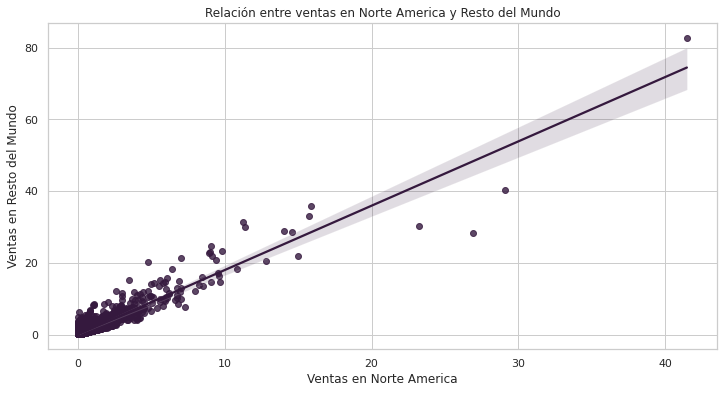

In [22]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Norte America')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Norte America y Resto del Mundo')
plt.show()

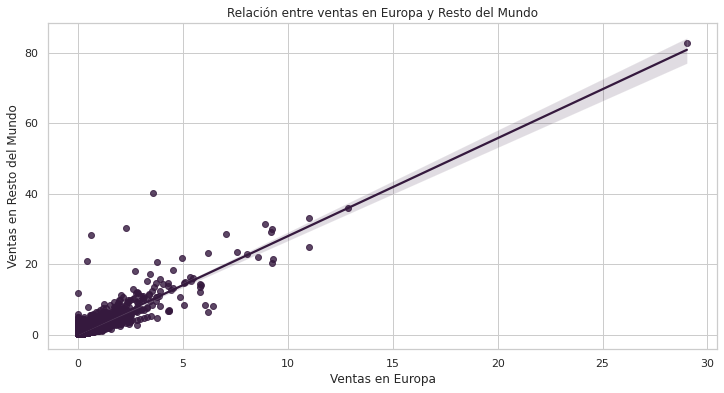

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Europa y Resto del Mundo')
plt.show()

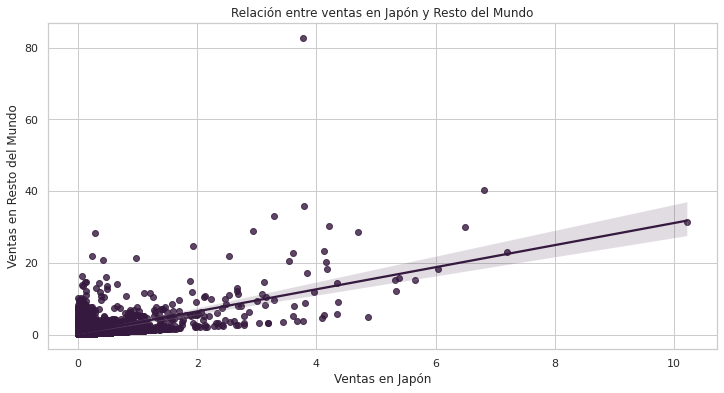

In [24]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Japón y Resto del Mundo')
plt.show()

Como podemos observar, existe una relación lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Japón, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones mencionadas, también crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un género, plataforma o desarrollador tiene éxito, tiene un alcance a todo el mundo y no sólo a una región.

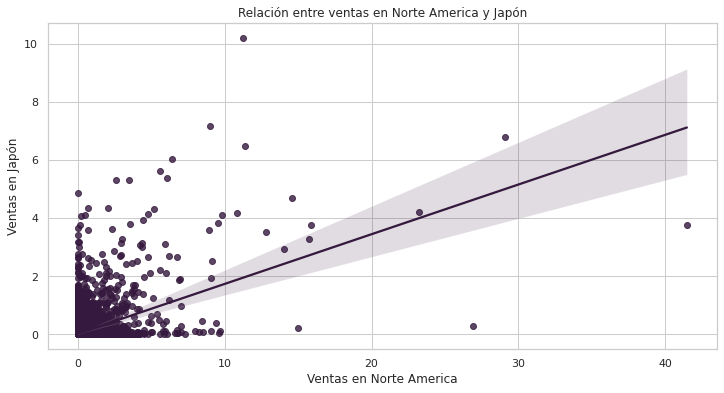

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Norte America')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Norte America y Japón')
plt.show()

Pero si observamos la relación entre las ventas en Estados Unidos y Japón, se mantiene la hipótesis anterior, donde a mayor cantidad de ventas en una región, también crecen las ventas en las otras regiones. Sin embargo, podemos notar una menor correlación, seguramente por las diferentes culturas y consumo, donde Estados Unidos y Japón tienen inclinación a distintos géneros y plataformas.

Más adelante podremos graficar y observar qué géneros y plataformas son las que más se consumen en cada región.

## ***3) Análisis Estadístico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

###Análisis descriptivo e inferencial de las variables historicas

####Feature: "Year"

Proporción de ventas por año:

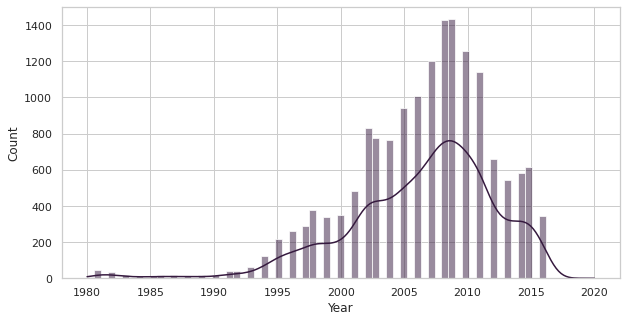

In [26]:
f, axs = plt.subplots(figsize=(10, 5))
ax = sns.histplot(x="Year", data=df,kde=True)
plt.show()

Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los años, sin embargo, también se logra identificar una caída en las ventas después del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

####Feature: "Platform"

Proporción de plataformas vendidas:

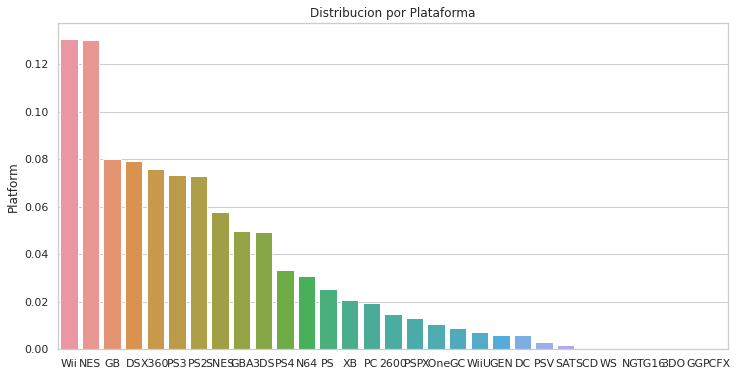

In [27]:
plt.figure(figsize=(12, 6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Se puede observar desde la perspectiva de las plataformas, un porcentaje considerable de ventas a lo largo de la historia de Nitendo con sus plataformas como la Nintendo wii, la Nintendo NES, la GameBoy y la Nintendo DS, dejando mucho más atras a las conocidas Xbox y Play Station.

![texto del enlace](https://www.rosario3.com/export/sites/rosario3/img/2021/06/28/1624775678_021044_1624775732_sumario_normal.jpg_344325628.jpg)


####Feature: "Genre"

Proporción de géneros vendidos:

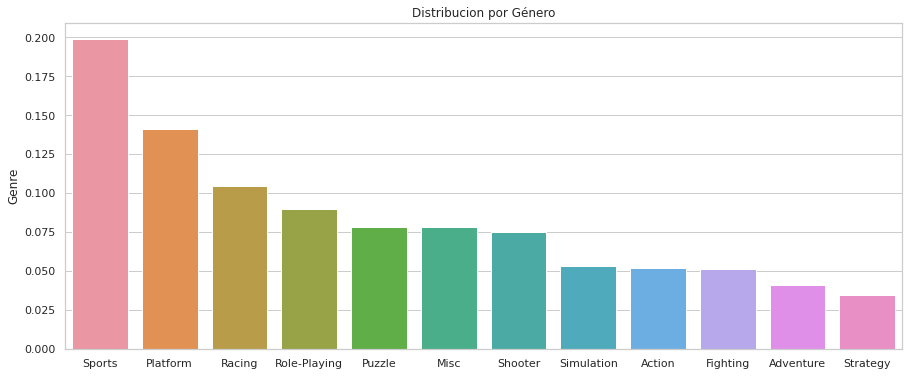

In [28]:
plt.figure(figsize=(15, 6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Género')
plt.show()

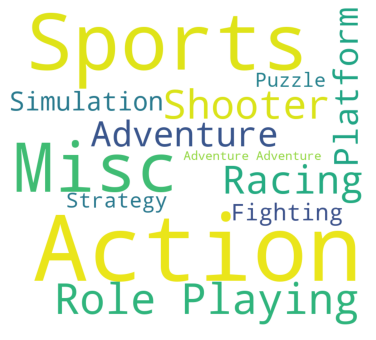

In [29]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Se puede observar que los géneros más consumidos son Sports y PLataform alcanzando casi el 30% del mercado, mientras lo siguen los juegos de Racing y Role-Playing, y en menor medida Puzzle, seguidos para nuestra sorpresa por Simulación, Adventure, Action,Shooter, Fighting, Strategy .

####Feature: "Publisher"

Proporción de desarrolladores con más ventas:

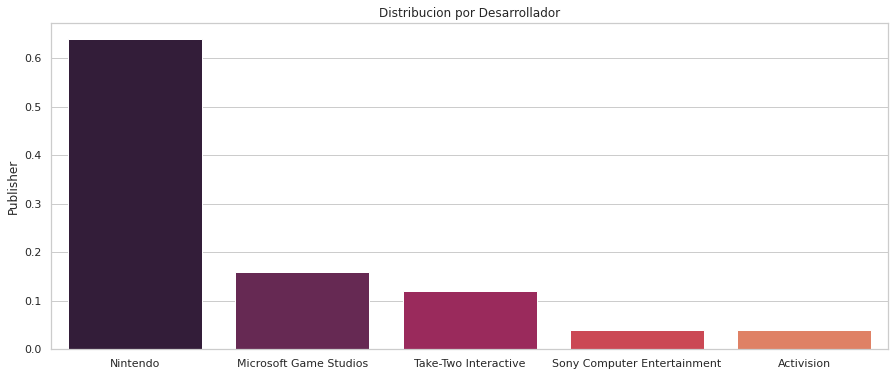

In [30]:
plt.figure(figsize=(15, 6))
x=df.head(50)["Publisher"].unique()
y=df.head(50)["Publisher"].value_counts()/df.head(50)["Publisher"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que el desarrollador que más juegos ha vendido a lo largo de la historia fue Nintendo (Así como también comprobamos anteriormente que es el que más plataformas ha ofrecido) con casi el 65% del mercado, seguido de Microsoft, Take-two, Sony y Activision.



---



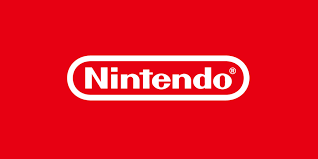







Proporción de desarrolladores con más ventas en los últimos 20 años:

####TOP 5 JUEGOS MÁS VENDIDOS HISTÓRICOS

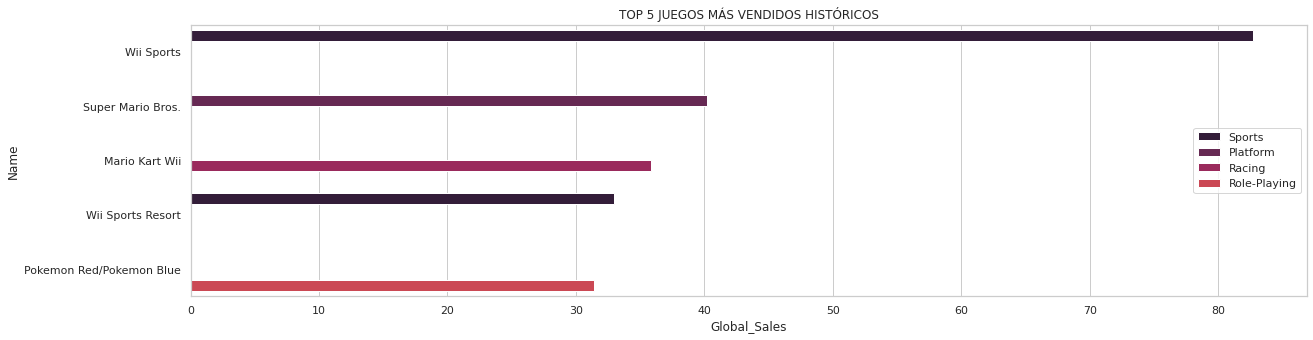

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(y='Name',x='Global_Sales',hue='Genre',data=df.sort_values("Global_Sales", ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS HISTÓRICOS')
plt.legend()

Podemos observar que en el top 5 de ventas históricas la alta demanda del genero Sports esto podemos comprobar debido a la dominacia en el historico vendido de Wii sports liderando el mismo y en 3er lugar con Wii Sports Resort. En el Top 5 tambien podemos encontrar clásicos como Mario y Mario Kart wii con los juegos de Plataforma/Racing. Podemos notar también el fuerte destacamento de los juegos de Role-Playing con los juegos de Pokemon, sin embargo, otros géneros como acción, shooter, Puzzle y aventura no han sido tan populares. 

Todos estos juegos lograron alcanzar un record entre 30 y 90 millones de ventas alrededor del mundo.

Recordemos también que las plataformas con más ventas que han acompañado estos juegos han sido las ofrecidas por Nintendo durante los 80's, los 90's y los años 2000.

###Análisis descriptivo e inferencial de las variables de la última década

####Feature: "Platform"

Proporción de plataformas vendidas en los últimos 10 años:

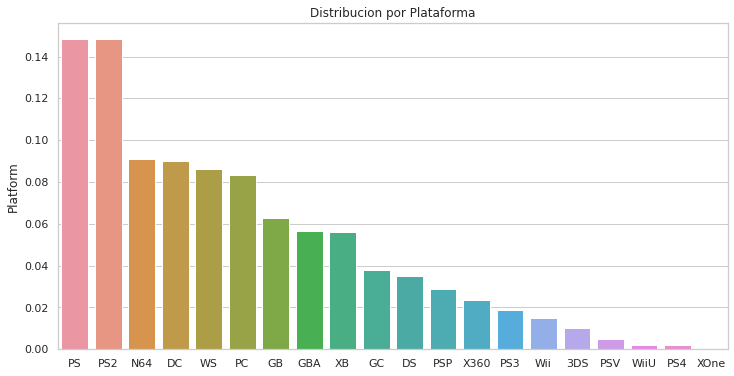

In [32]:
plt.figure(figsize=(12, 6))
x=df_new["Platform"].unique()
y=df_new["Platform"].value_counts()/df_new["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Podemos notar que nuevas plataformas han aparecido la última década, logrando llevarse casi el 20% de las ventas por parte de Sony con la Playstation y la Playstation 2, seguido de Nintendo con las N64 y su Nintendo DS obteniendo apenas entre el 5 el 7,5% del mercado. Podemos también observar que aparece en este gráfico la opción de PC como plataforma de juegos gracias a los avances en procesadores y placas de video.

![texto del enlace](https://i.pinimg.com/originals/e0/bb/1a/e0bb1ae20f3a9e54a01f952a75e80def.jpg)

####Feature: "Genre"

Proporción de géneros vendidos en los últimos 10 años:

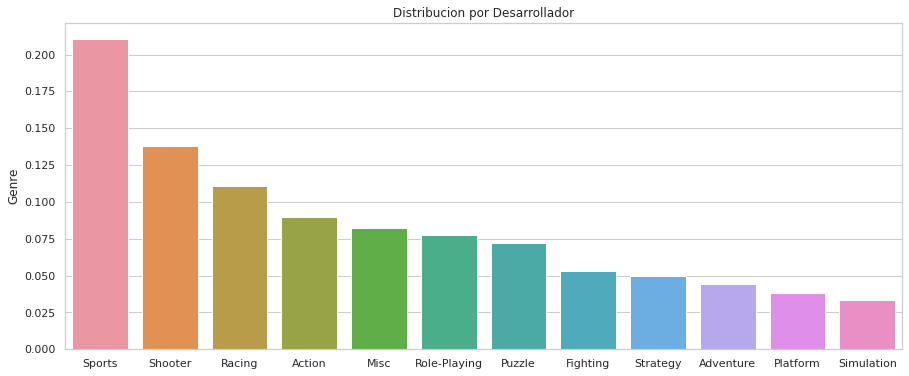

In [33]:
plt.figure(figsize=(15, 6))
x=df_new["Genre"].unique()
y=df_new["Genre"].value_counts()/df_new["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Desarrollador')
plt.show()

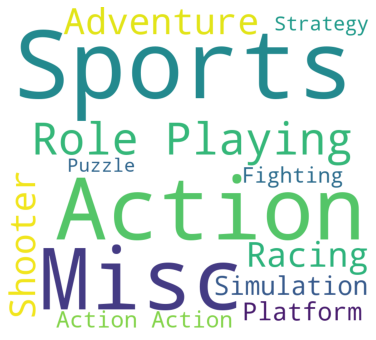

In [34]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df_new['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Podemos notar que los juegos de Sports han tomado mucha más relevancia en las últimas décadas logrando casi el 35% del mercado actual. El género de Role-Playing y simulation han caído a casi el 15% de las ventas del mercado, compitiendo directamente con los juegos de tipo Shooter, Acción y Racing que lograron tener una mayor popularidad al salir al mercado de la mano de las consolas de Playstation.

Es notable cómo los juegos de Role-Playing han dejado de tener un gran consumo así como los juegos de tipo Puzzle.


####Feature: "Publisher"

Proporción de desarrolladores con más ventas en los últimos 10 años:

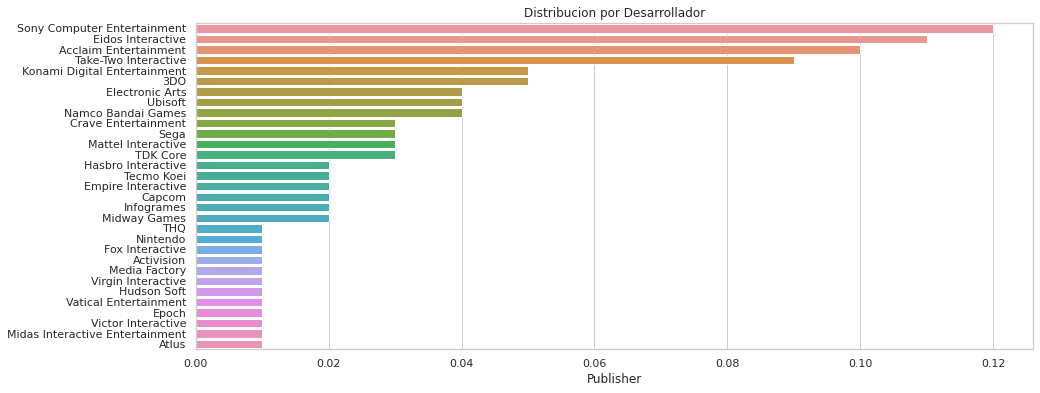

In [35]:
plt.figure(figsize=(15, 6))
x=df_new.head(100)["Publisher"].unique()
y=df_new.head(100)["Publisher"].value_counts()/df_new.head(100)["Publisher"].value_counts().sum()
ax=sns.barplot(x=y, y=x)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que luego de los 2000 han aparecido una enorme variedad de desarrolladores de juegos y software, desatacando a Sony Computer Etertainment y Eidos interactive como proveedores de software y servicios a desarrolladores de juegos con el 20% del mercado, seguido de empresas más conocidas en el ambiente gamer como Acclaim Entertainment, Take two, Konami y 3DO.

Con el aumento del consumo de juegos de acción y aventura, podemos intuir que vino de la mano de la nueva generación de consolas como Playstation.

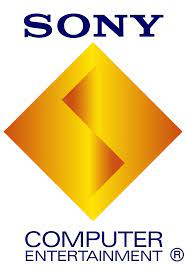







####TOP 5 JUEGOS MÁS VENDIDOS


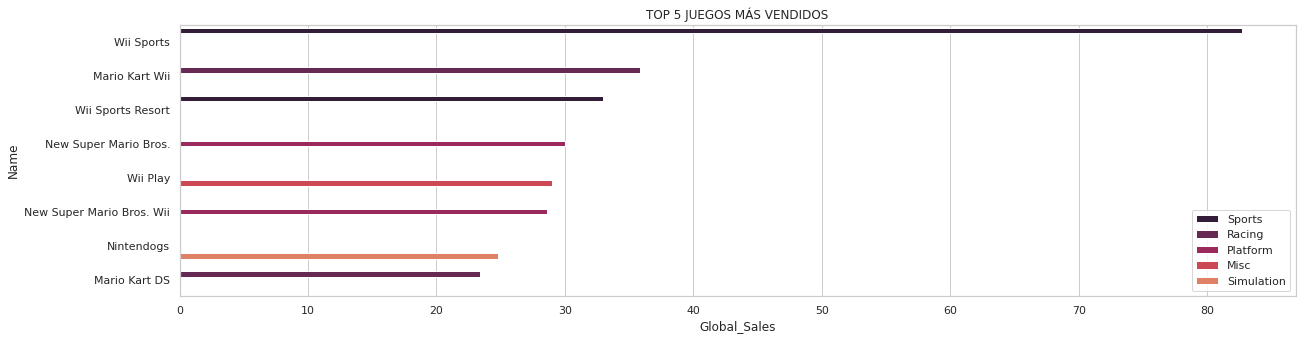

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(y='Name',x='Global_Sales',hue='Genre',data=df_new.sort_values("Global_Sales", ascending=False).head(8)).set_title('TOP 5 JUEGOS MÁS VENDIDOS')
plt.legend()

Podemos observar que en el top 5 de ventas de la última década que el género Sports ha superado a los demás en ventas de forma considerable con mas de 80 millones de ventas, siendo acompañado por los juegos de tipo Racing y Plataform. Liderando el Top 5 podemos encontrar grandes juegos como Wii Sports, Mario Kart Wii, Wii Sports resort, New Super Mario Bros, Wii Play, New super Mario Bros Wii, Nintendogs y Mario Kart Ds.

Todos estos juegos lograron alcanzar un record entre 25 y 85 millones de ventas alrededor del mundo.

Se puede observar la dominancia de Nintedo liderando el Top 5 de ventas en la ultima decada

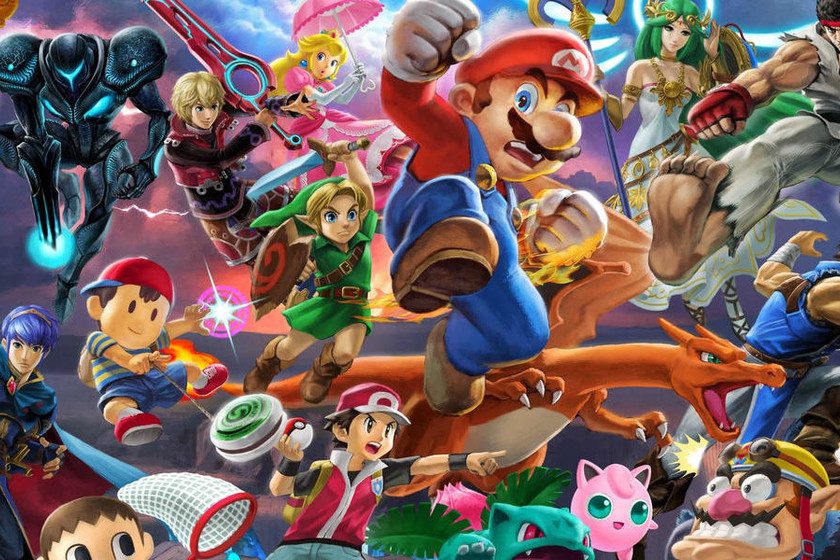

###Evolución de las plataformas en el tiempo

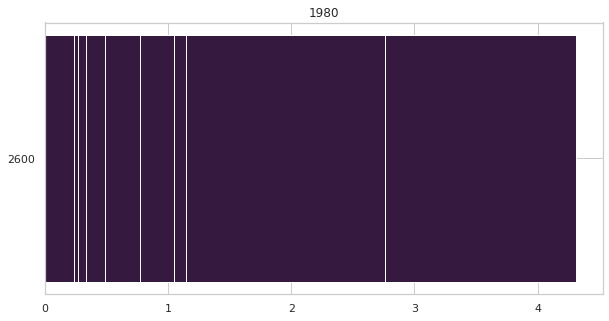

In [37]:
from matplotlib import animation
years = df.sort_values("Year")['Year'].unique()

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = df.loc[df['Year'] == year, :]
  ax.clear() #cada vez que haya una iteracion se limpiará el grafico
  ax.barh(data_temp.Platform,data_temp.Global_Sales)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) 

In [38]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

####RECORD DE VENTAS POR REGIÓN:

#####ESTADOS UNIDOS:

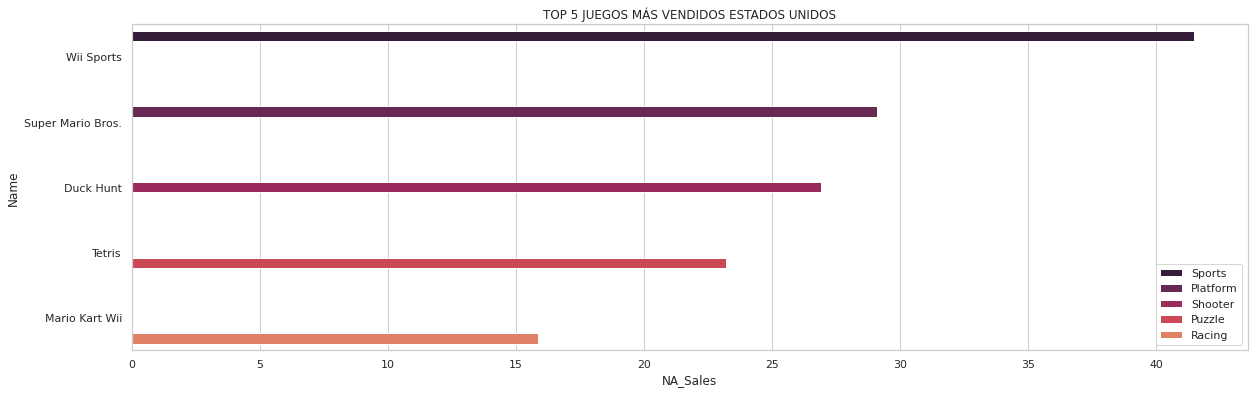

In [39]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='NA_Sales',hue='Genre',data=df.sort_values('NA_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

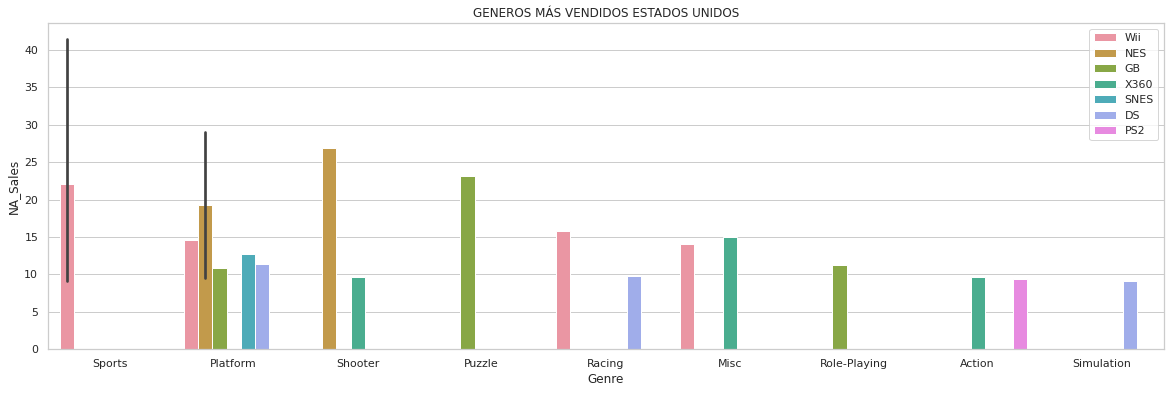

In [40]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

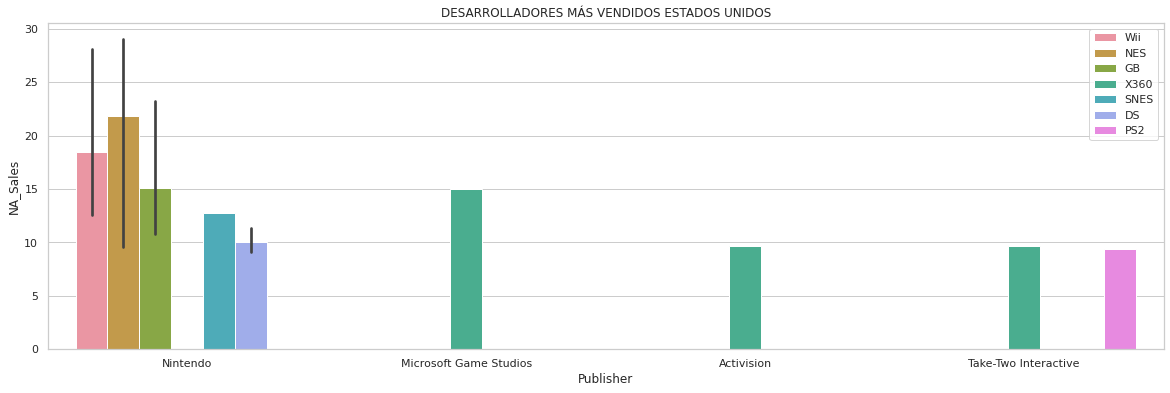

In [41]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

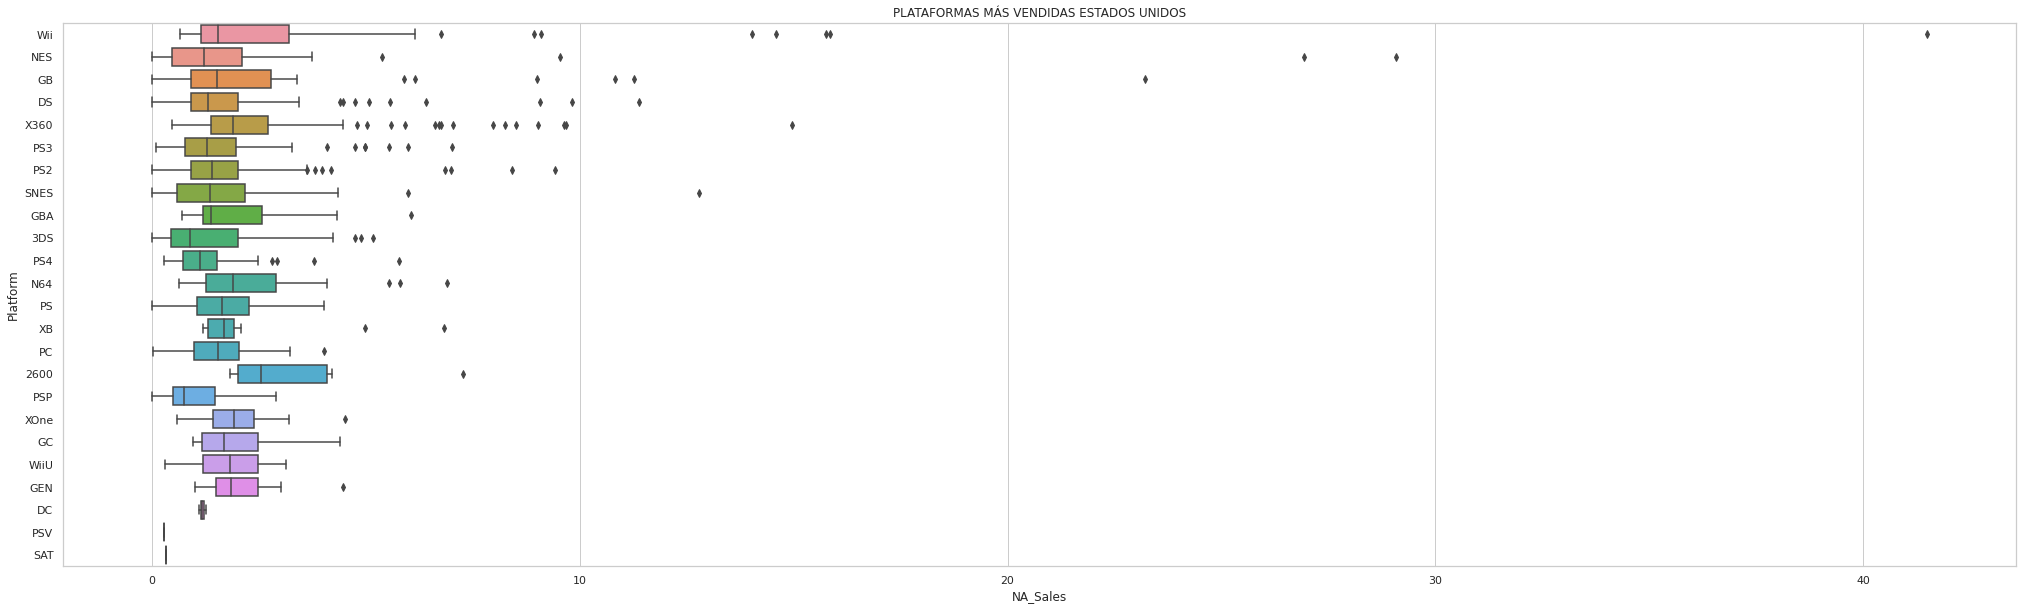

In [42]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'NA_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS UNIDOS')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Estados Unidos se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con más de 40 millones en ventas.

También podemos observar que los americanos han tenido un consumo preferente por juegos y consolas de Nintendo, seguido de desarrollos propios del país producidos por Microsoft Games y Activision, acompañados por plataformas como XBox. 

Finalmente vemos que en Estados Unidos existe un consumo de juegos de género muy variado, liderando las ventas los juegos de Deporte, Plataforma y Shooter, que inclusive se ofertan para distintas consolas.

Es interesante ver que en Estados Unidos lideran los juegos y consolas japoneses, y cómo los juegos de deporte y disparos tienen gran relevancia.

#####JAPÓN:

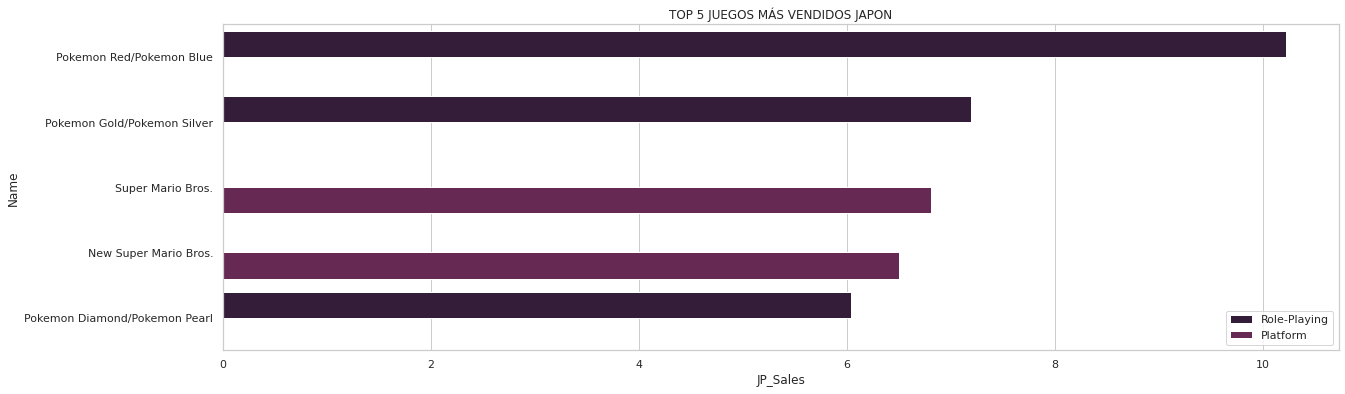

In [43]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='JP_Sales',hue='Genre',data=df.sort_values('JP_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS JAPON')
plt.legend()

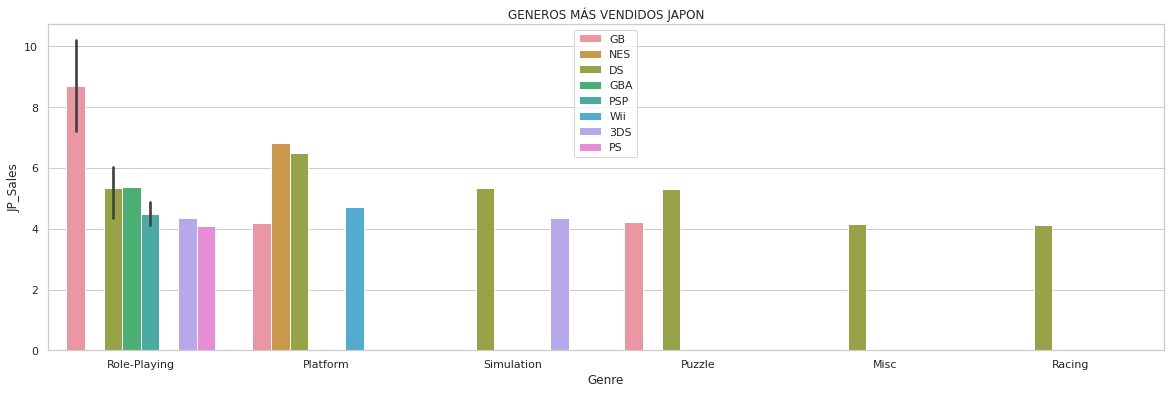

In [44]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS JAPON')
plt.legend()

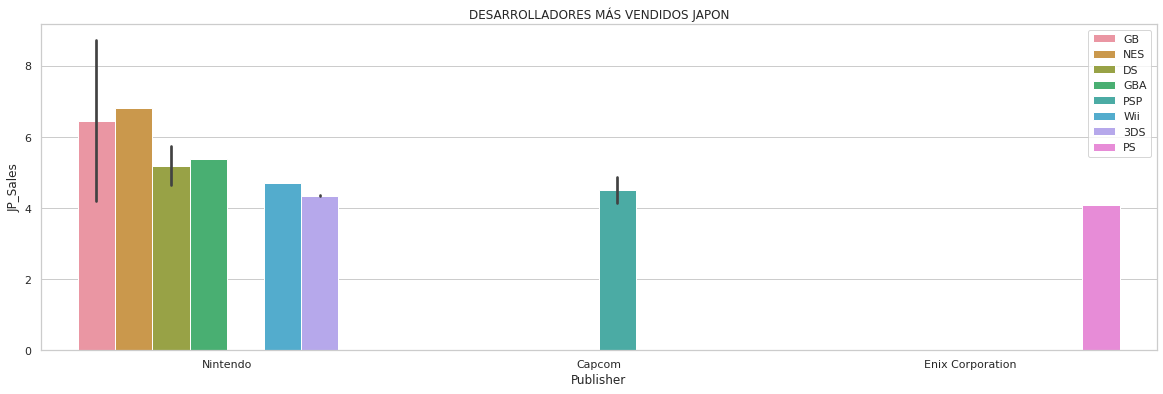

In [45]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS JAPON')
plt.legend()

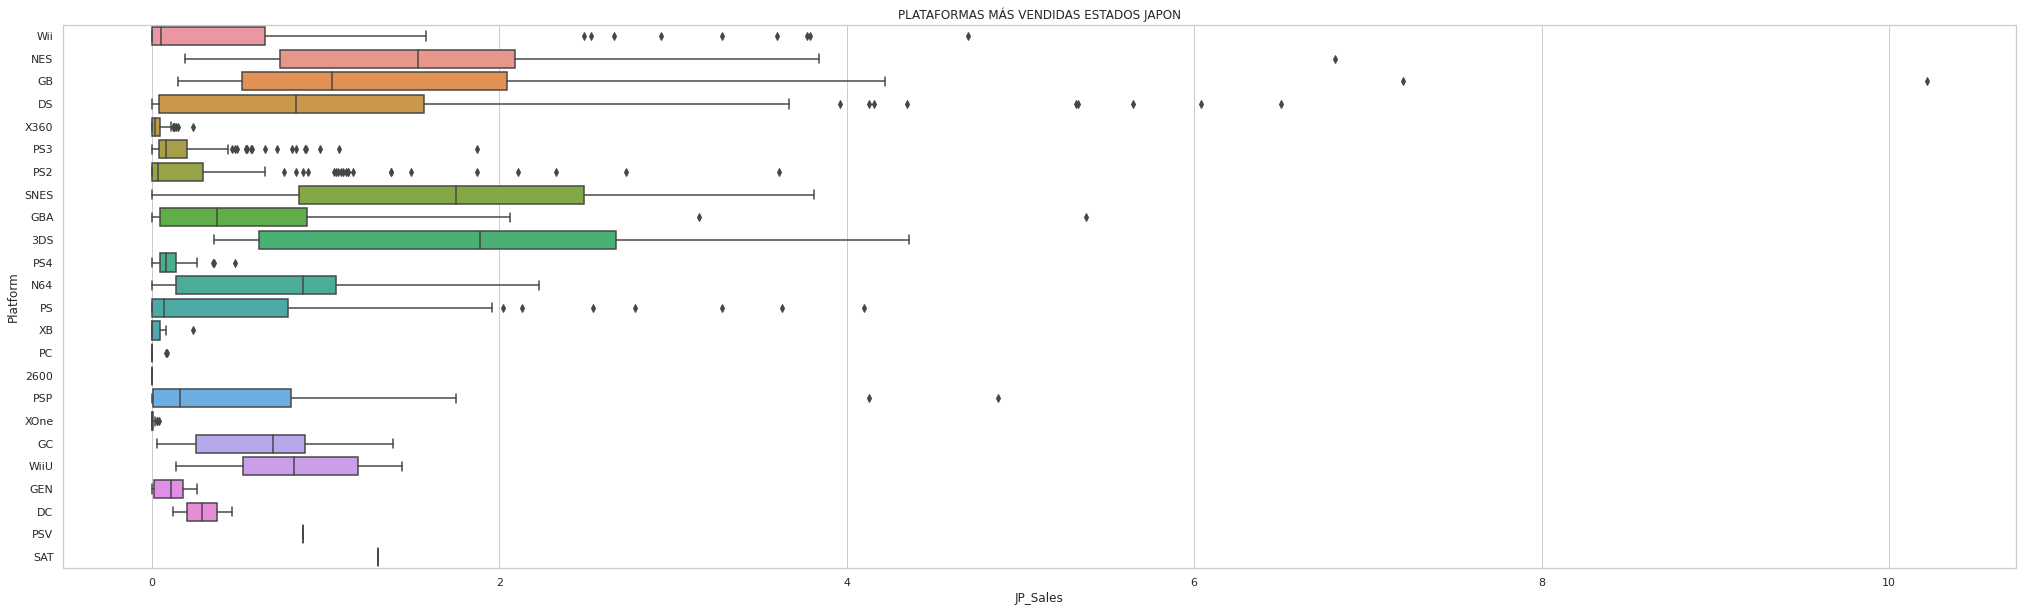

In [46]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'JP_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS JAPON')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Japón se lo lleva el género de Role-Playing o RPG, más precisamente con los juegos Pokemon Red y Pokemos Blue con más de 10 millones en ventas.

También podemos observar que los japoneses han tenido un consumo preferente por juegos y consolas propios del país, producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores como Capcom que han tenido grandes entregas como Resident Evil y Street Fighter. 

Finalmente vemos que en Japón existe un consumo de juegos de género no tan variado, liderando las ventas los juegos de RPG, para todas las consolas disponibles de Nintendo. 
Cabe destacar a la Nintendo DS, que si bien no ha superado en ventas a la Nintendo NES o a la GameBoy, ha permanecido como plataforma definitiva para géneros menos populares como Simulación, Puzzle, Misc y Carreras.

Es interesante ver que en Japón lideran los juegos y consolas nacionales, notandose una menor diversidad de consumos de géneros, y cómo las plataformas de Estados Unidos han tenido apenas relevancia con ventas de la Playstation Vita, lo cual deja en evidencia que Japón tiene preferencia por plataformas portátiles.

#####EUROPA:

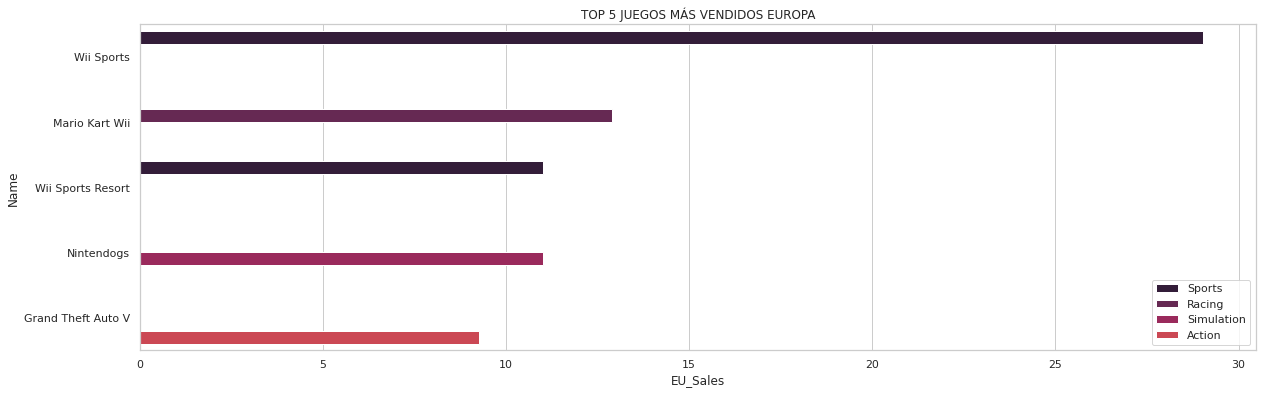

In [47]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='EU_Sales',hue='Genre',data=df.sort_values('EU_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS EUROPA')
plt.legend()

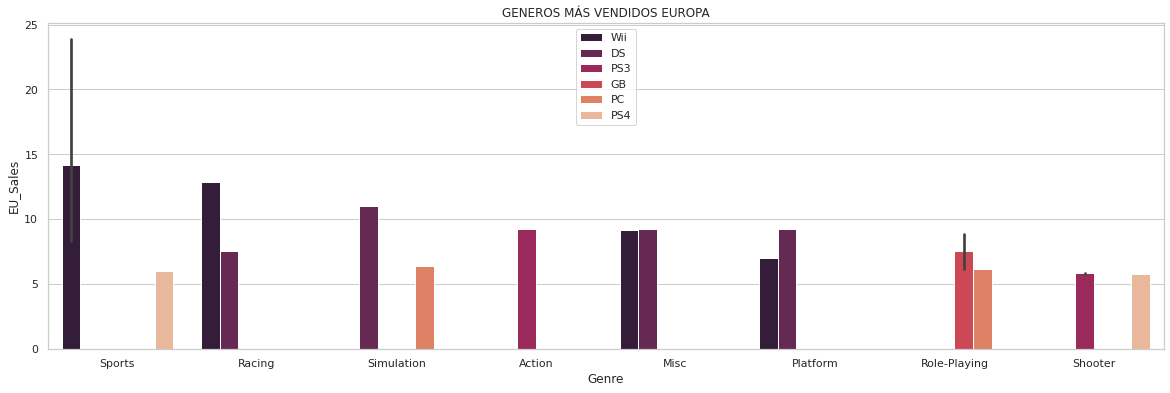

In [48]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS EUROPA')
plt.legend()

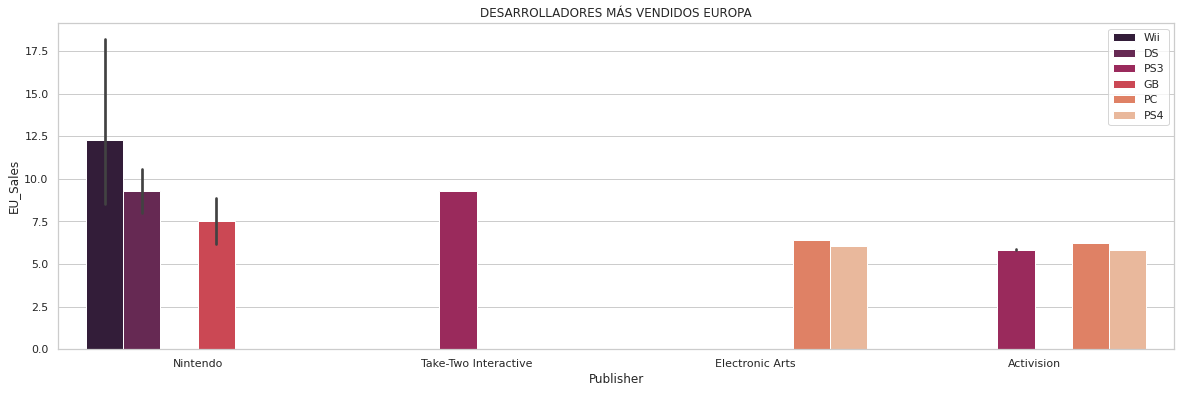

In [49]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS EUROPA')
plt.legend()

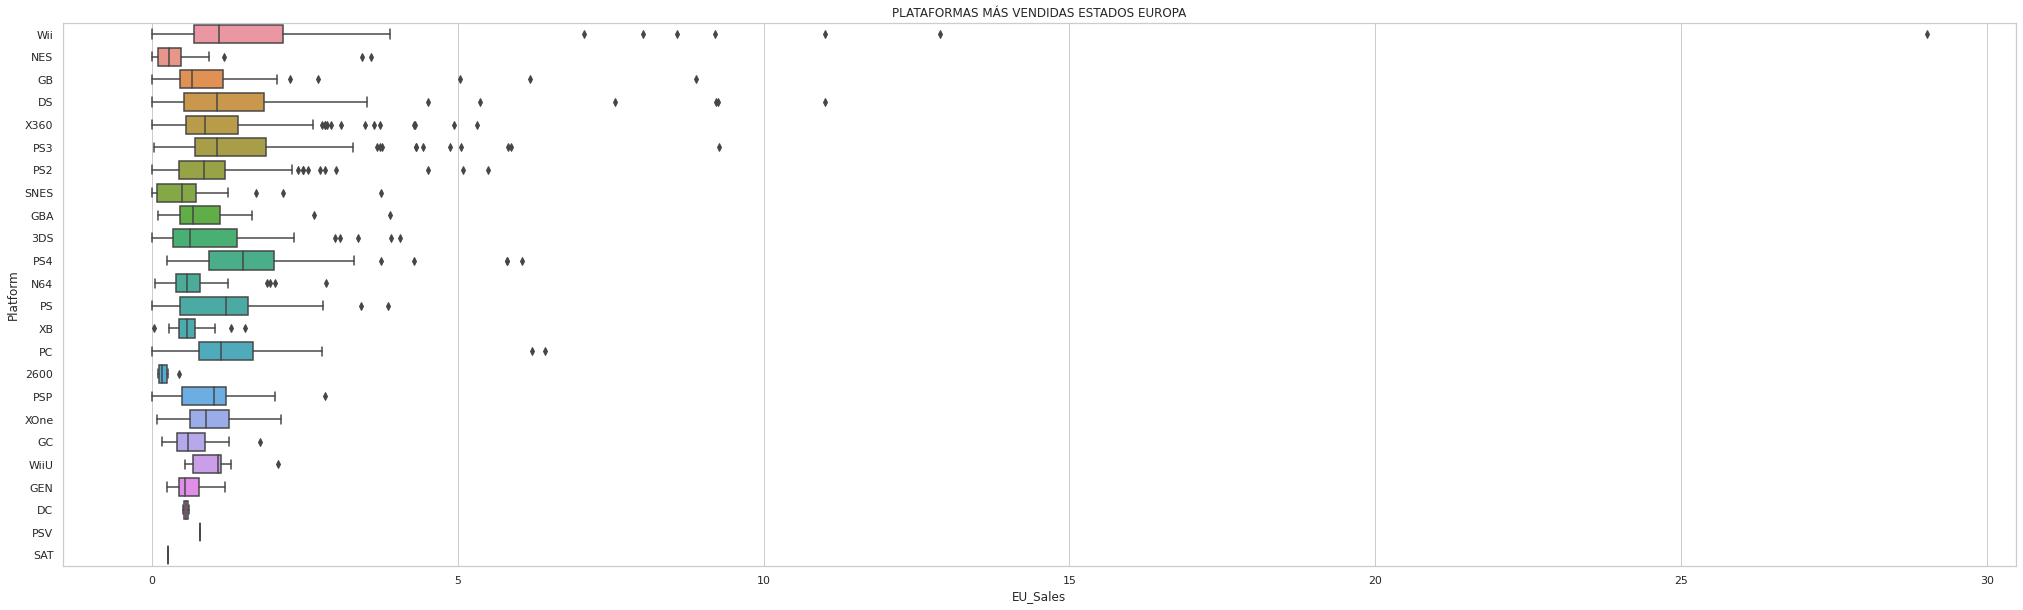

In [50]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'EU_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS EUROPA')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Europa se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con casi 30 millones en ventas.

También podemos observar que los europeos han tenido un consumo muy parecido al de Estados Unidos, con una preferencia a juegos producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores americanos como Electronic Arts y Activision que ya habíamos mencionado anteriormente. 

Finalmente vemos que en Europa existe un consumo bastante parejo de juegos, pero con géneros muy variado, casi como si se aceptara lo mejor de Estados Unidos y lo mejor de Japón, liderando las ventas los juegos de Deportes, Carreras, Simulación y Acción, en donde compiten plataformas como Nintendo y Playstation.
Cabe destacar que ha aparecido la PC como plataforma de juegos, que si bien no ha superado en ventas a la Nintendo o la Playstation, ha permanecido como alternativa a las plataformas antes menciondas, gracias a la posibilidad de permitir jugar juegos de cualquier desarrollador sea de Nintendo, Sony o Microsoft.

Es interesante ver que en Europa lideran los juegos y consolas japoneses, pero a diferencia de Estados Unidos o Japón, los europeos consumen una mayor diversidad de géneros y plataformas, teniendo preferencia por géneros que tengan cierto vínculo con la realidad como Deportes, Carreras y Simulación. 